<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Change-width-of-page" data-toc-modified-id="Change-width-of-page-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Change width of page</a></span></li><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Import packages</a></span></li></ul></li><li><span><a href="#Import-colors" data-toc-modified-id="Import-colors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import colors</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></span><ul class="toc-item"><li><span><a href="#Sample-information-&amp;-time-to-diagnosis" data-toc-modified-id="Sample-information-&amp;-time-to-diagnosis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sample information &amp; time to diagnosis</a></span></li><li><span><a href="#Variant-calls---dictionaries" data-toc-modified-id="Variant-calls---dictionaries-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Variant calls - dictionaries</a></span></li><li><span><a href="#Variant-calls---dataframes" data-toc-modified-id="Variant-calls---dataframes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Variant calls - dataframes</a></span></li></ul></li><li><span><a href="#Plot-all-trajectories" data-toc-modified-id="Plot-all-trajectories-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot all trajectories</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Cases" data-toc-modified-id="Cases-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Cases</a></span></li></ul></li></ul></li></ul></div>

## Change width of page

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Import packages

In [22]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, IndexFormatter, MultipleLocator
import pandas as pd
import csv

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Import colors

In [3]:
# Lists of colors for plots
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [4]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'
# yellow = '#ffffd4'

In [5]:
mutation_class_colors = {'NPM1': c1,
                        'DNA methylation': '#5098BC',
                        'Chromatin modifiers': '#E57E38',
                        'Transcription factors':  '#54AF51',
                        'Transcriptional corepressors':  '#1E8739',
                        'Tumour suppressor': '#A460AD',
                        'Spliceosome': '#C94776',
                        'Cohesin': '#17AA9F',
                        'Cell signalling': '#195BA6',
                        'mCA': grey4}

In [6]:
extra_color_classes = {'DNA methylation': ['dodgerblue', 'lightskyblue', '#0570b0', '#74a9cf', '#d0d1e6', '#7194B5'],
                      'Chromatin modifiers': ['#fec44f', '#F29F33', '#FF9700', '#E5AC2C'],
                      'Transcription factors': ['#6CDD66' '#6EB796'] ,
                      'Transcriptional corepressors': ['#0A6D1F', '#5F8E72'] ,
                      'Tumour suppressor': ['#bcbddc', '#54278f', '#9242C6', '#7621AD', 'darkviolet', 'purple'],
                      'Spliceosome': ['#fa9fb5', '#f768a1', '#980043', '#C10552'],
                      'Cohesin': ['#0B897D'],
                      'Cell signalling': ['#06396D', '#22405E'],
                      'mCA': ['#637382']}

In [7]:
mutation_class_text_colors = {'NPM1': c1,
                        'DNA methylation': '#3485A5',
                        'Chromatin modifiers': '#E06F22',
                        'Transcription factors':  '#4DA04A',
                        'Transcriptional corepressors':  '#2A7726',
                        'Tumour suppressor': '#8C5593',
                        'Spliceosome': '#B2426B',
                        'Cohesin': '#15938A',
                        'Cell signalling': '#0B447C',
                        'mCA': grey4}

In [8]:
mutation_classes = {'NPM1': 'NPM1',
                   'DNMT3A': 'DNA methylation',
                   'TET2': 'DNA methylation',
                   'IDH1': 'DNA methylation',
                   'IDH2': 'DNA methylation',
                   'ASXL1': 'Chromatin modifiers',
                   'EZH2': 'Chromatin modifiers',
                   'RUNX1': 'Transcription factors',
                   'CEBPA': 'Transcription factors',
                   'GATA2': 'Transcription factors',
                   'BCOR': 'Transcriptional corepressors',
                   'BCORL1': 'Transcriptional corepressors',
                   'TP53': 'Tumour suppressor',
                   'PPM1D': 'Tumour suppressor',
                   'CHEK2': 'Tumour suppressor',
                   'WT1': 'Tumour suppressor',
                   'CBL': 'Tumour suppressor',
                   'DDX41': 'Tumour suppressor',
                   'SRSF2': 'Spliceosome',
                   'SF3B1': 'Spliceosome',
                   'U2AF1': 'Spliceosome',
                   'ZRSR2': 'Spliceosome',
                   'RAD21': 'Cohesin',
                   'STAG2': 'Cohesin',
                   'FLT3': 'Cell signalling',
                   'KIT': 'Cell signalling',
                   'JAK2': 'Cell signalling',
                   'KRAS': 'Cell signalling',
                   'NRAS': 'Cell signalling',
                   'PTPN11': 'Cell signalling',
                   'CSF3R': 'Cell signalling',
                   'GNB1': 'Cell signalling',
                   'GNAS': 'Cell signalling',
                   'MPL': 'Cell signalling',
                    'mCA': 'mCA',
                   '15q CNLOH': 'mCA',
                   '4q CNLOH': 'mCA',
                   '4 gain?': 'mCA',
                   'X gain': 'mCA',
                   '19p CNLOH': 'mCA',
                   '9p CNLOH': 'mCA',
                   '7q CNLOH': 'mCA'}

# Import data

In [9]:
def category_mutation(mutation):
    if mutation == '-':
        category = '-'
    else:
        category = mutation_classes[mutation]
    return category

In [10]:
def years_to_diagnosis(months):
    years = months/12
#     print(years)
    if 0 <= years <0.5:
        category = '0-6 months'
    if 0.5 <= years <1:
        category = '0.5-1 year'
    if 1 <= years <2:
        category = '1-2 years'
    if 2 <= years <3:
        category = '2-3 years'
    if 3 <= years <4:
        category = '3-4 years'
    if 4 <= years <5:
        category = '4-5 years'
    if 5 <= years <6:
        category = '5-6 years'
    if 6 <= years <7:
        category = '6-7 years'
    if 7 <= years <8:
        category = '7-8 years'
    if 8 <= years <9:
        category = '8-9 years'
    if 9 <= years <10:
        category = '9-10 years'
    if 10 <= years <11:
        category = '10-11 years'
    if 11 <= years <12:
        category = '11-12 years'
    if 12 <= years <13:
        category = '12-13 years'
    if 13 <= years <14:
        category = '13-14 years'
    if 14 <= years <15:
        category = '14-15 years'
    if 15 <= years <16:
        category = '15-16 years'
    return category

## Sample information & time to diagnosis

In [12]:
df_samples = pd.read_csv('Data_files/UKCTOCS_samples_processed_information.csv')
df_samples

,ID,SAMPLE_ID,Age at SampleTaken (yrs),Age at Dx (yrs),Time to Dx (from sample collection) (months),TIME TO Dx GROUPING,MATCHED SAMPLE
0,C92_002,C92_002_s1,73.73,81.1,88.37,7-8 yrs preDx,CNTRL_169_s1
1,C92_002,C92_002_s2,75.00,81.1,73.19,6-7 yrs preDx,CNTRL_169_s2
2,C92_002,C92_002_s3,75.83,81.1,63.26,5-6 yrs preDx,CNTRL_169_s3
3,C92_002,C92_002_s4,76.56,81.1,54.49,4-5 yrs preDx,CNTRL_169_s4
4,C92_002,C92_002_s5,77.57,81.1,42.30,3-4 yrs preDx,CNTRL_169_s5
...,...,...,...,...,...,...,...
519,CNTRL_204,CNTRL_204_s1,65.32,NaN,NaN,NaN,C92_036_s1
520,CNTRL_204,CNTRL_204_s2,66.36,NaN,NaN,NaN,C92_036_s2
521,CNTRL_204,CNTRL_204_s3,67.42,NaN,NaN,NaN,C92_036_s3
522,CNTRL_204,CNTRL_204_s4,68.36,NaN,NaN,NaN,C92_036_s4


In [21]:
#Create a dictionary of the time to diagnosis for each pre-AML sample and number of 
df_samples_timings = df_samples[['SAMPLE_ID', 'Time to Dx (from sample collection) (months)']]
df_samples_timings = df_samples_timings.set_index('SAMPLE_ID')
cases_timings = df_samples_timings.to_dict(orient = 'index')

cases_timings_dict = {}
for k, v in cases_timings.items():
    cases_timings_dict[k] = v['Time to Dx (from sample collection) (months)']
    
# cases_timings_dict

## Variant calls - dictionaries

In [14]:
#creating trajectories dictionary
with open('Data_files/UKCTOCS_watson_non-germline_variants_calls_SNVs_indels_mCAs_April_2024.csv') as csvfile:
    readreader = csv.reader(csvfile)
    row_count = 0
    
    case_trajectories = {}
    control_trajectories = {}
    
    for row in readreader:
#         print(row)
        if row_count>0:
            sample_name = row[0].split('_')[0]+'_'+row[0].split('_')[1] #e.g. C92_001
            sample_ID = row[0] #e.g. C92_001_s1
            age = float(row[1]) #age sample was taken
            months_to_diagnosis = row[2]
            age_at_AML = row[3]
            matched_sample = row[4]
            VAF = row[12]
            if VAF == '':
                VAF = 0
            variant_type = row[14]
            gene = row[15]
            AA_change = row[19]
            
            if gene in mutation_classes.keys():
                mutation_class = mutation_classes[gene]
                variant = gene+'_'+AA_change
            else:
                if row[14] in ['CNLOH', 'gain', '?gain']:
                    mutation_class = 'mCA'
                    variant = row[5]+'_'+row[14]
                else:
                    mutation_class = '-'
                
            if sample_ID[0:2]=='C9':
                case_or_control = 'case'
            else:
                case_or_control = 'control'
                
            if case_or_control == 'control':
                months_to_diagnosis = cases_timings_dict[matched_sample]
                
            variant_ID = (variant, mutation_class, variant_type)
            
            if VAF != 'not processed':      
                if case_or_control == 'case':
                    if sample_name in case_trajectories.keys():
                        if variant_ID in case_trajectories[sample_name]:
                            case_trajectories[sample_name][variant_ID][float(months_to_diagnosis)]=float(VAF)
                        else:
                            case_trajectories[sample_name][variant_ID] = {float(months_to_diagnosis): float(VAF)}      
                    else:
                        case_trajectories[sample_name]={variant_ID: {float(months_to_diagnosis): float(VAF)}}

                if case_or_control == 'control':
                    if sample_name in control_trajectories.keys():
                        if variant_ID in control_trajectories[sample_name]:
                            control_trajectories[sample_name][variant_ID][float(months_to_diagnosis)]=float(VAF)
                        else:
                            control_trajectories[sample_name][variant_ID] = {float(months_to_diagnosis): float(VAF)}      
                    else:
                        control_trajectories[sample_name]={variant_ID: {float(months_to_diagnosis): float(VAF)}}
                
        row_count+=1

case_trajectories_sorted = {}
for k, v in case_trajectories.items():
    for a, b in v.items():
        sorted_trajectory = {k: v for k, v in sorted(list(b.items()), reverse = True)}
        if k in case_trajectories_sorted.keys():
            case_trajectories_sorted[k][a]=sorted_trajectory
        else:
            case_trajectories_sorted[k]={a: sorted_trajectory}
            
control_trajectories_sorted = {}
for k, v in control_trajectories.items():
    for a, b in v.items():
        sorted_trajectory = {k: v for k, v in sorted(list(b.items()), reverse = True)}
        if k in control_trajectories_sorted.keys():
            control_trajectories_sorted[k][a]=sorted_trajectory
        else:
            control_trajectories_sorted[k]={a: sorted_trajectory}

- If JAK2 V617F without 9p CN-LOH, the cell fraction is 2x VAF.  When the 9P CN-LOH is acquired, the VAF is in fact a cell fraction (because present on both alleles), so does not need to be doubled.

In [23]:
#put the case trajectories in terms of cell fractions
case_trajectories_cell_fractions = {}

for sample_ID, variants in case_trajectories_sorted.items():
#     print(sample_ID)
    for variant, trajectory in variants.items():
#         print(variant)
        if variant[0][0:3]=='chr': #no need to convert cell fraction as already cell fraction
            if sample_ID in case_trajectories_cell_fractions.keys():
                case_trajectories_cell_fractions[sample_ID][variant]=trajectory
            else:
                case_trajectories_cell_fractions[sample_ID]={variant: trajectory}
                
        else:
            if variant[0]=='JAK2_p.V617F':
                if ('chr9p_CNLOH', 'mCA', 'CNLOH') in variants.keys(): #i.e. both JAK2 and chr9p CNLOH present in this individual
                    new_trajectory = {}
                    for age in trajectory.keys():
                        JAK2_VAF = trajectory[age]
                        chr9p_CF = variants[('chr9p_CNLOH', 'mCA', 'CNLOH')][age]
                        single_JAK2 = ((JAK2_VAF)-chr9p_CF)
                        JAK2_CF = chr9p_CF + (single_JAK2*2)
                        new_trajectory[age]=JAK2_CF
#                     print('new trajectory = ', new_trajectory)
                    if sample_ID in case_trajectories_cell_fractions.keys():
                        case_trajectories_cell_fractions[sample_ID][variant]=new_trajectory
                    else:
                        case_trajectories_cell_fractions[sample_ID]={variant: new_trajectory}
                else:
                    new_trajectory = {}
                    for age, VAF in trajectory.items():
                        new_trajectory[age]=VAF*2
#                     print('new trajectory = ', new_trajectory)
                    if sample_ID in case_trajectories_cell_fractions.keys():
                        case_trajectories_cell_fractions[sample_ID][variant]=new_trajectory
                    else:
                        case_trajectories_cell_fractions[sample_ID]={variant: new_trajectory}

            elif variant[0][0:4]=='TET2':
                if ('chr4q_CNLOH', 'mCA', 'CNLOH') in variants.keys(): #i.e. both JAK2 and chr9p CNLOH present in this individual
                    new_trajectory = {}
                    for age in trajectory.keys():
                        TET2_VAF = trajectory[age]
                        chr4q_CF = variants[('chr4q_CNLOH', 'mCA', 'CNLOH')][age]
                        single_TET2 = ((TET2_VAF)-chr4q_CF)
                        TET2_CF = chr4q_CF + (single_TET2*2)
                        new_trajectory[age]=TET2_CF
#                     print('new trajectory = ', new_trajectory)
                    if sample_ID in case_trajectories_cell_fractions.keys():
                        case_trajectories_cell_fractions[sample_ID][variant]=new_trajectory
                    else:
                        case_trajectories_cell_fractions[sample_ID]={variant: new_trajectory}
                else:
                    new_trajectory = {}
                    for age, VAF in trajectory.items():
                        new_trajectory[age]=VAF*2
#                     print('new trajectory = ', new_trajectory)
                    if sample_ID in case_trajectories_cell_fractions.keys():
                        case_trajectories_cell_fractions[sample_ID][variant]=new_trajectory
                    else:
                        case_trajectories_cell_fractions[sample_ID]={variant: new_trajectory}

            else:
                new_trajectory = {}
                for age, VAF in trajectory.items():
                    new_trajectory[age]=VAF*2 #convert VAF to cell fraction
#                 print('new trajectory = ', new_trajectory)
                if sample_ID in case_trajectories_cell_fractions.keys():
#                     print('sample ID in dictionary')
                    case_trajectories_cell_fractions[sample_ID][variant]=new_trajectory
                else:
#                     print('sample ID not in dictionary')
                    case_trajectories_cell_fractions[sample_ID]={variant: new_trajectory}

# case_trajectories_cell_fractions

In [24]:
#put the control trajectories in terms of cell fractions
control_trajectories_cell_fractions = {}

for sample_ID, variants in control_trajectories_sorted.items():
#     print(sample_ID)
    for variant, trajectory in variants.items():
#         print(variant)
        if variant[0][0:3]=='chr': #no need to convert cell fraction as already cell fraction
            if sample_ID in control_trajectories_cell_fractions.keys():
                control_trajectories_cell_fractions[sample_ID][variant]=trajectory
            else:
                control_trajectories_cell_fractions[sample_ID]={variant: trajectory}
                
        else:
            if variant[0]=='JAK2_p.V617F':
                if ('chr9p_CNLOH', 'mCA', 'CNLOH') in variants.keys(): #i.e. both JAK2 and chr9p CNLOH present in this individual
                    new_trajectory = {}
                    for age in trajectory.keys():
                        JAK2_VAF = trajectory[age]
                        chr9p_CF = variants[('chr9p_CNLOH', 'mCA', 'CNLOH')][age]
                        single_JAK2 = ((JAK2_VAF)-chr9p_CF)
                        JAK2_CF = chr9p_CF + (single_JAK2*2)
                        new_trajectory[age]=JAK2_CF
#                     print('new trajectory = ', new_trajectory)
                    if sample_ID in control_trajectories_cell_fractions.keys():
                        control_trajectories_cell_fractions[sample_ID][variant]=new_trajectory
                    else:
                        control_trajectories_cell_fractions[sample_ID]={variant: new_trajectory}
                else:
                    new_trajectory = {}
                    for age, VAF in trajectory.items():
                        new_trajectory[age]=VAF*2
#                     print('new trajectory = ', new_trajectory)
                    if sample_ID in control_trajectories_cell_fractions.keys():
                        control_trajectories_cell_fractions[sample_ID][variant]=new_trajectory
                    else:
                        control_trajectories_cell_fractions[sample_ID]={variant: new_trajectory}

            elif variant[0][0:4]=='TET2':
                if ('chr4q_CNLOH', 'mCA', 'CNLOH') in variants.keys(): #i.e. both JAK2 and chr9p CNLOH present in this individual
                    new_trajectory = {}
                    for age in trajectory.keys():
                        TET2_VAF = trajectory[age]
                        chr4q_CF = variants[('chr4q_CNLOH', 'mCA', 'CNLOH')][age]
                        single_TET2 = ((TET2_VAF)-chr4q_CF)
                        TET2_CF = chr4q_CF + (single_TET2*2)
                        new_trajectory[age]=TET2_CF
#                     print('new trajectory = ', new_trajectory)
                    if sample_ID in control_trajectories_cell_fractions.keys():
                        control_trajectories_cell_fractions[sample_ID][variant]=new_trajectory
                    else:
                        control_trajectories_cell_fractions[sample_ID]={variant: new_trajectory}
                else:
                    new_trajectory = {}
                    for age, VAF in trajectory.items():
                        new_trajectory[age]=VAF*2
#                     print('new trajectory = ', new_trajectory)
                    if sample_ID in control_trajectories_cell_fractions.keys():
                        control_trajectories_cell_fractions[sample_ID][variant]=new_trajectory
                    else:
                        control_trajectories_cell_fractions[sample_ID]={variant: new_trajectory}

            else:
                new_trajectory = {}
                for age, VAF in trajectory.items():
                    new_trajectory[age]=VAF*2 #convert VAF to cell fraction
#                 print('new trajectory = ', new_trajectory)
                if sample_ID in control_trajectories_cell_fractions.keys():
#                     print('sample ID in dictionary')
                    control_trajectories_cell_fractions[sample_ID][variant]=new_trajectory
                else:
#                     print('sample ID not in dictionary')
                    control_trajectories_cell_fractions[sample_ID]={variant: new_trajectory}
                    
#             print('control trajectories = ', control_trajectories_cell_fractions)
#             print()

# control_trajectories_cell_fractions

# Plot all trajectories

### Cases

In [17]:
all_cases_CFs = []

for k, v in case_trajectories_cell_fractions.items():
    for variant, trajectories in v.items():
        for timing, CF in trajectories.items():
            all_cases_CFs.append(CF)

In [18]:
all_controls_CFs = []

for k, v in control_trajectories_cell_fractions.items():
    for variant, trajectories in v.items():
        for timing, CF in trajectories.items():
            all_controls_CFs.append(CF)

xmin =  -186.333
xmax =  8.873000000000001


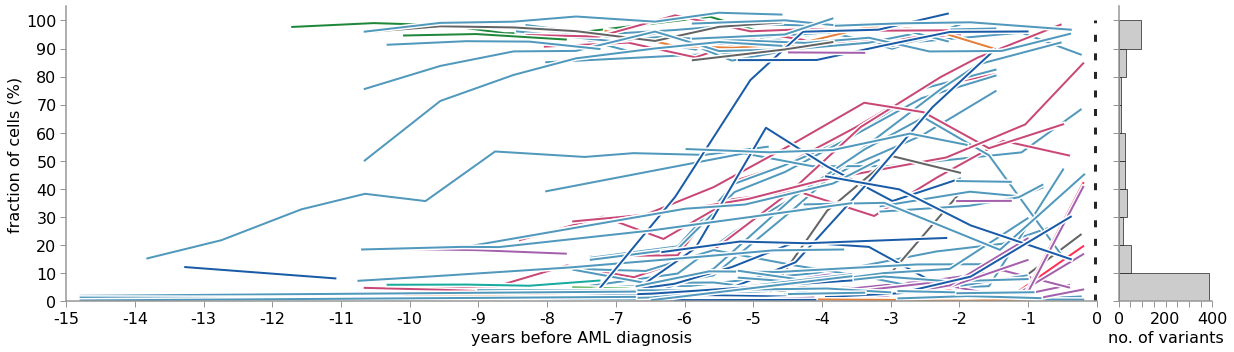

In [19]:
#PLOT THE CASE TRAJECTORIES
fig, axes = plt.subplots(1, 2, figsize = (17.25, 5), sharey = True, gridspec_kw={'width_ratios': [11, 1]})

ax1 = axes[0]
ax2 = axes[1]

data_lw = 2

#PLOT THE TRAJECTORIES
for k, v in case_trajectories_cell_fractions.items():
    for variants, CFs in v.items():
        x = []
        y = []
        mutation_class = variants[1]
        for timings, VAF in CFs.items():
            x.append(-timings)
            y.append(VAF)
            
        if len(x)>1:
            ax1.plot(x, y, color = 'white', lw = 5)
            ax1.plot(x, y, color = mutation_class_colors[mutation_class], lw = data_lw)
            
ax1.plot([0, 0], [0, 1.0], lw = 7, linestyle = ':', color = grey5)

xmin, xmax = ax1.get_xlim()
print('xmin = ', xmin)
print('xmax = ', xmax)

#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)
    ax1.spines[axis].set_color(grey3)

x_major_ticks = [i*12 for i in [-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0]]
x_major_tick_labels = ['-15', '-14', '-13', '-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0']
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = 16)
ax1.xaxis.set_tick_params(width=1, color = grey3, length = 6)

y_major_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y_major_tick_labels = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = 16)
ax1.yaxis.set_tick_params(width=1, color = grey3, length = 6)

# ax1.grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')

ax1.set_xlabel('years before AML diagnosis', fontsize = 16)
ax1.set_ylabel('fraction of cells (%)', fontsize = 16)

ax1.set_ylim(0, 1.05)
ax1.set_xlim(-15*12, 0)


#PLOT THE HISTOGRAM
#cases VAF distributions
x = []
y = []

# ax2.hist(all_cases_CFs, color = grey2, bins = 10, range = (0, 1), orientation = 'horizontal')
ax2.hist(all_cases_CFs, color = grey2, bins = 10, range = (0, 1), orientation = 'horizontal', edgecolor = "black", lw = 0.6)

ax2.xaxis.set_major_locator(MultipleLocator(100))
ax2.xaxis.set_minor_locator(MultipleLocator(50))
# ax2.set_xlim(0, 300)

#Only show the required axis lines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax2.spines[axis].set_linewidth(1.5)
    ax2.spines[axis].set_color(grey3)

# ax2.set_ylim(0, 0.58)
ax2.set_xlim(0, 400)

x_major_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400]
x_major_tick_labels = ['0', '', '', '', '200', '', '', '', '400']
ax2.set_xticks(x_major_ticks)
ax2.set_xticklabels(x_major_tick_labels, fontsize = 16)
ax2.xaxis.set_tick_params(width=1, color = grey3, length = 6)
ax2.yaxis.set_tick_params(width=1, color = grey3, length = 6)

ax2.set_xlabel('no. of variants', fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


# from matplotlib.lines import Line2D

# custom_lines = [Line2D([0], [0], color=mutation_class_colors['DNA methylation'], lw=data_lw),
#                 Line2D([0], [0], color=mutation_class_colors['Chromatin modifiers'], lw=data_lw),
#                 Line2D([0], [0], color=mutation_class_colors['Transcription factors'], lw=data_lw),
#                 Line2D([0], [0], color=mutation_class_colors['Transcriptional corepressors'], lw=data_lw),
#                 Line2D([0], [0], color=mutation_class_colors['Tumour suppressor'], lw=data_lw),
#                 Line2D([0], [0], color=mutation_class_colors['Spliceosome'], lw=data_lw),
#                 Line2D([0], [0], color=mutation_class_colors['Cohesin'], lw=data_lw),
#                 Line2D([0], [0], color=mutation_class_colors['Cell signalling'], lw=data_lw),
#                 Line2D([0], [0], color=mutation_class_colors['NPM1'], lw=data_lw),
#                 Line2D([0], [0], color=mutation_class_colors['mCA'], lw=data_lw)]
# ax1.legend(custom_lines, ['DNA methylation', 'Chromatin modifiers', 'Transcription factors',
#                          'Transcriptional corepressors', 'Tumour suppressor', 'Spliceosome',
#                          'Cohesin', 'Cell signalling', 'NPM1', 'mCA'], fontsize = 14, loc='upper left', bbox_to_anchor=(1, 0.95))

plt.tight_layout()
plt.show()

xmin =  -186.1925
xmax =  5.922499999999999


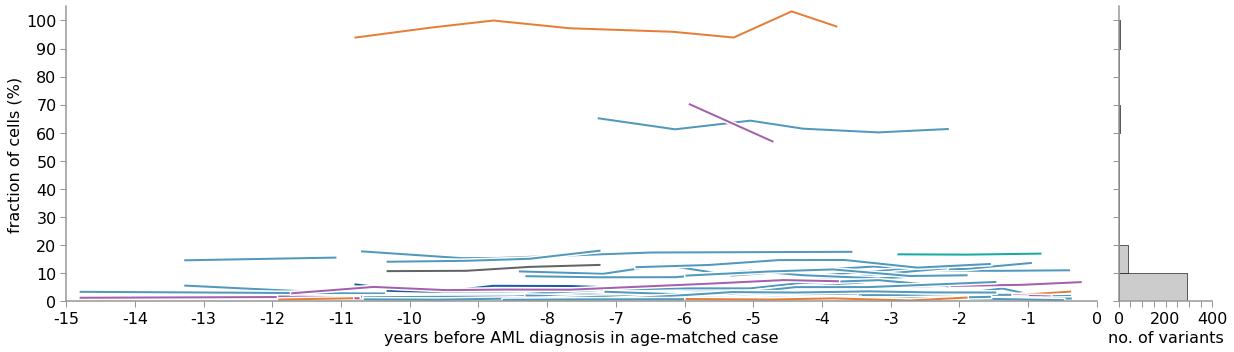

In [20]:
#PLOT THE CONTROL TRAJECTORIES
fig, axes = plt.subplots(1, 2, figsize = (17.25, 5), sharey = True, gridspec_kw={'width_ratios': [11, 1]})

ax1 = axes[0]
ax2 = axes[1]

data_lw = 2

#PLOT THE TRAJECTORIES
for k, v in control_trajectories_cell_fractions.items():
    for variants, CFs in v.items():
        x = []
        y = []
        mutation_class = variants[1]
        for timings, VAF in CFs.items():
            x.append(-timings)
            y.append(VAF)
            
        if len(x)>1:
            ax1.plot(x, y, color = 'white', lw = 5)
            ax1.plot(x, y, color = mutation_class_colors[mutation_class], lw = data_lw)

xmin, xmax = ax1.get_xlim()
print('xmin = ', xmin)
print('xmax = ', xmax)

#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)
    ax1.spines[axis].set_color(grey3)

x_major_ticks = [i*12 for i in [-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0]]
x_major_tick_labels = ['-15', '-14', '-13', '-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0']
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = 16)
ax1.xaxis.set_tick_params(width=1, color = grey3, length = 6)

y_major_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y_major_tick_labels = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = 16)
ax1.yaxis.set_tick_params(width=1, color = grey3, length = 6)

# ax1.grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')

ax1.set_xlabel('years before AML diagnosis in age-matched case', fontsize = 16)
ax1.set_ylabel('fraction of cells (%)', fontsize = 16)

ax1.set_ylim(0, 1.05)
ax1.set_xlim(-15*12, 0)


#PLOT THE HISTOGRAM
#controls VAF distributions
x = []
y = []

# ax2.hist(all_controls_CFs, color = grey2, bins = 10, range = (0, 1), orientation = 'horizontal')
ax2.hist(all_controls_CFs, color = grey2, bins = 10, range = (0, 1), orientation = 'horizontal', edgecolor = "black", lw = 0.6)

ax2.xaxis.set_major_locator(MultipleLocator(100))
ax2.xaxis.set_minor_locator(MultipleLocator(50))
# ax2.set_xlim(0, 300)

#Only show the required axis lines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax2.spines[axis].set_linewidth(1.5)
    ax2.spines[axis].set_color(grey3)

# ax2.set_ylim(0, 0.58)
ax2.set_xlim(0, 400)

x_major_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400]
x_major_tick_labels = ['0', '', '', '', '200', '', '', '', '400']
ax2.set_xticks(x_major_ticks)
ax2.set_xticklabels(x_major_tick_labels, fontsize = 16)
ax2.xaxis.set_tick_params(width=1, color = grey3, length = 6)
ax2.yaxis.set_tick_params(width=1, color = grey3, length = 6)

ax2.set_xlabel('no. of variants', fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.tight_layout()
plt.show()